# General Inverse Probability Weighting: From a Density Ratio Estimation Perspective

## (A)IPWE with finite-value action
Inverse Probabiltiy Weighting (IPW) has been regarded as standard approach in Potential Outcomes framework when the action space $\mathcal{A}$ is of finite values (e.g., $\mathcal{A} = \{0,1\}$). For example, when $\mathcal{A} = \{0,1\}$, and assuming that our goal is to estimate $\mathbb{E}[Y(1)]$, the general idea is to consider an estimator 
constructed by
$$
 \hat{E} = \frac{1}{n} \sum_{i=1}^n \frac{Y_i A_i}{\hat{\mathbb{P}} (A=1|X)}.
$$
The idea behind such construction is quite straightforward. In fact,
$$
\mathbb{E}\left[\frac{YA}{\mathbb{P}(A = 1 | X)}\right]
=
\mathbb{E}\left[\mathbb{E}\left[\frac{YA}{\mathbb{P}(A = 1 | X)}\right] | X\right].
$$
Assuming unconfoundedness, i.e., $Y$ and $A$ are conditionally independent given $X$, it is easily checked that the r.h.s. of the equation above is but $\mathbb{E}[Y(1)]$.
Similary idea gives also the construction of Augumented IPW estimator (AIPWE), i.e.,
$$
 \hat{E} = \frac{1}{n} \sum_{i=1}^n \frac{(Y_i - \hat{\mu}_1(X_i))  A_i}{\hat{\mathbb{P}} (A=1|X = X_i)} + \frac{1}{n} \sum_{i=1}^n\hat{\mu}_1(X_i),
$$
where $\hat{\mu}_1 (\cdot)$ is an estimation of the conditional expectation function $\mathbb{E}[Y(1) | X = \cdot]$.
In general, a proper data splitting is required to remove the dependence of $\hat{\mu}_1$ and the data point $X_i$.

In both case, there is a "inversed probability" mechanism w.r.t. $\mathbb{P}(A=1|X)$.
The idea behind such construtions can be ragarded as a balanacning mechanism between the population $X$ and the target sub-population $X(1)$ associated with action $1$, through re-weighting. The weight is but the inverse probability $1/\mathbb{P}(A =1 | X)$.
Meanwhile, one notices that this construction only works in the case where the action space is of finite values. In the next section, we inverstigate the general setting where the action is an arbitrary Polish space.

## State-action (A)IPWE

The state-action variable is simply defined as the couple $X^{\natural} = (X,A)$. Now, we consider the policy evaluation problem where the sampling policy is denoted by $\pi$ and the target policy is $\mathring{\pi}$. Our goal is to evaluate the average pentential outcomes under the target policy $\mathbb{E}[Y^{\mathring{\pi}}]$, using the data collected under sampling policy $\pi$.
In this case, one notices that the underlying distributions to be balanced are the state-action variable $X^{\natural}$ and $\mathring{X}^{\natural} = (\mathring{X}, \mathring{A})$, where $\mathring{A}$ is the action variable assocaited to the target policy $\mathring{\pi}$ and $\mathring{X}$ is the target population. When no covariate shifts are involved, the distribution of $\mathring{X}$ is the same as $X$.
On the one hand, the samples of $X^{\natural}$ is already collected in the data set. On the other hand, the target policy is known, which implies that $\mathring{X}^{\natural}$ can also be sampled with additional sampling mechanism according to $\mathring{\pi}$. Hence, the rest of the problem becomes the balancing between two probability measures, which enters into the classical Density Ratio Estimation problem. 

## Density ratio estimtation

Assume that we have already the samples $X_i^{\natural}$ and $\mathring{X}_j^{\natural}$. We show in the following that how to perform a balancing between the two empirical measures $\xi_n^{\pi^{\natural}} = \frac{1}{n}\sum_{i=1}^n \delta_{X_i^{\natural}}$ and $\mathring{\xi}_m^{\mathring{\pi}^{\natural}} = \frac{1}{m}\sum_{j=1}^m \delta_{\mathring{X}_j^{\natural}}$ through a general IPW construction.

First, we assign a label $0$ to each the source data point $X_i^{\natural}$ and a label $1$ to each target data point $\mathring{X}_j^{\natural}$.
Then, we consider an artificial classification problem w.r.t. these labels. The associated conditional probability function is denoted by $e(\cdot) = \mathbb{E}[I | Z = \cdot]$,
where $I$ is the random variable of the label and $Z$ is the underlying instrumental state-action random variable. More precisely, we have
$$
Z|I=0 \sim \xi^{\pi^{\natural}},
$$
and
$$
Z|I=1 \sim \mathring{\xi}^{\mathring{\pi}^{\natural}}.
$$
Finally, the associated weight function can be defined as
$$
\frac{e(\cdot)}{1 - e(\cdot) } \cdot \frac{\mathbb{E}[1-I]}{\mathbb{E}[I]},
$$
with the empirical version given by
$$
\frac{\hat{e}(\cdot)}{1 - \hat{e}(\cdot) } \cdot \frac{n}{m}.
$$

The rest of the work is to estimate $e(\cdot)$ through a off-the-shelf classifier, which is a typicall supervised learning problem.

## Why it works

By definition, it is easily checked that $I$ and $(X^{\natural}, \mathring{X}^{\natural})$ are conditional independ given $Z$.
Hence, we have
$$
\mathbb{E}[f(Z) I] = \mathbb{E}[f(\mathring{X}^{\natural})] \mathbb{E}[I],
$$
and
$$
\mathbb{E}[f(Z) (1-I)] = \mathbb{E}[f(X^{\natural})] \mathbb{E}[1-I],
$$
which implies
$$
\mathbb{E} \left[f(Z) (1-I) \frac{e(Z)}{1-e(Z)}\right]/\mathbb{E}[I]
=
\mathbb{E}[f(\mathring{X}^{\natural})].
$$


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

## Generate synthetic data set

In [2]:
n = 2000
m = 2000
xi = torch.normal(mean = -1, std = 2, size = (n,1))
xi_ring = torch.zeros(size = (m,1))
for i in range(m):
    if torch.rand(1).item()>0.3:
        xi_ring[i,0] = torch.normal(mean = -4, std = 2, size = (1,)).item()
    else:
        xi_ring[i,0] = torch.normal(mean = 3, std = 0.2, size = (1,)).item()


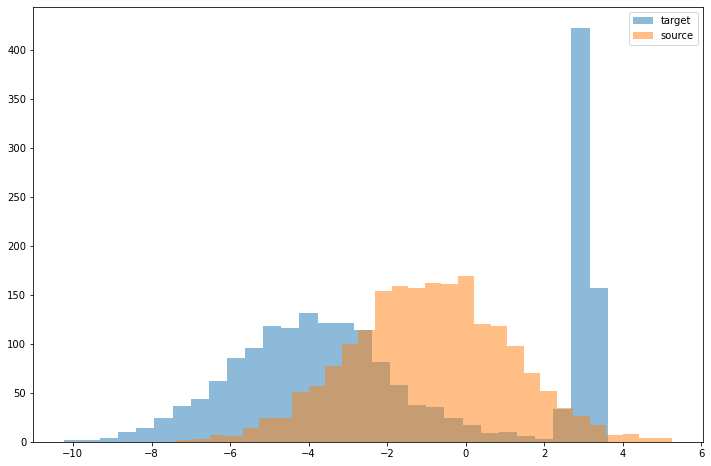

In [3]:
plt.figure(figsize = (12,8))
plt.hist(xi_ring[:,0].to("cpu").detach().numpy(), alpha = 0.5, bins = 30, label ="target")
plt.hist(xi[:,0].to("cpu").detach().numpy(), alpha = 0.5, bins = 30, label ="source")
plt.legend()

## Build artificial classification probelm

In [3]:
X = torch.cat((xi,xi_ring),0)
Y = torch.cat((torch.zeros((n,1)),torch.ones((m,1))),0)
# apply a random permutation
rand_index = torch.multinomial(torch.ones(m+n),m+n,replacement = False)

ratio = 0.2 # test/all ratio
Xtrain = X[rand_index[0:int((n+m)*ratio)],:].to("cuda:0")
Ytrain = Y[rand_index[0:int((n+m)*ratio)],:].to("cuda:0")
Xtest = X[rand_index[int((n+m)*ratio)+1:],:].to("cuda:0")
Ytest = Y[rand_index[int((n+m)*ratio)+1:],:].to("cuda:0")

## Construct a Sigmoid NN with 2 hidden layers

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self,input_dim = 1, num_nodes = 16):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(input_dim, num_nodes),
            nn.ReLU(),
            #nn.Dropout(0.3),
            #nn.BatchNorm1d(num_nodes), 
            
            nn.Linear(num_nodes, num_nodes),
            nn.Sigmoid(),
            nn.Linear(num_nodes, num_nodes),
            nn.Sigmoid(),
            #nn.Dropout(0.3),
            #nn.BatchNorm1d(num_nodes), 
            
            #nn.Linear(num_nodes, num_nodes),
            #nn.ReLU(),
            # # #nn.Dropout(0.3),
            # # nn.BatchNorm1d(num_nodes), 
            
            nn.Linear(num_nodes, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.flatten(x)
        target = self.linear_stack(x)
        return target

In [5]:
learning_rate = 1e-3
batch_size = 64
epochs = 500
model = NeuralNetwork().to("cuda:0")


dataset_train = TensorDataset(Xtrain,Ytrain.type(torch.float))
dataset_test = TensorDataset(Xtest,Ytest.type(torch.float))
train_dataloader = DataLoader(dataset_train, batch_size=batch_size)
test_dataloader = DataLoader(dataset_test, batch_size=batch_size)

In [6]:
loss_fn = nn.MSELoss()

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)

In [8]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            #print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    return loss


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    #test_loss, correct = 0, 0
    test_loss = 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            #correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    return test_loss
    #correct /= size
    #print(f"Avg loss: {test_loss:>8f} \n")

In [9]:
loss_trace = []
train_loss_trace = []
for t in tqdm(range(epochs)):
    #print(f"Epoch {t+1}\n-------------------------------")
    current_train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    current_test_loss = test_loop(test_dataloader, model, loss_fn)
    loss_trace.append(current_test_loss)
    train_loss_trace.append(current_train_loss.to("cpu").detach().numpy())
print("Done!")

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:58<00:00,  8.57it/s]

Done!


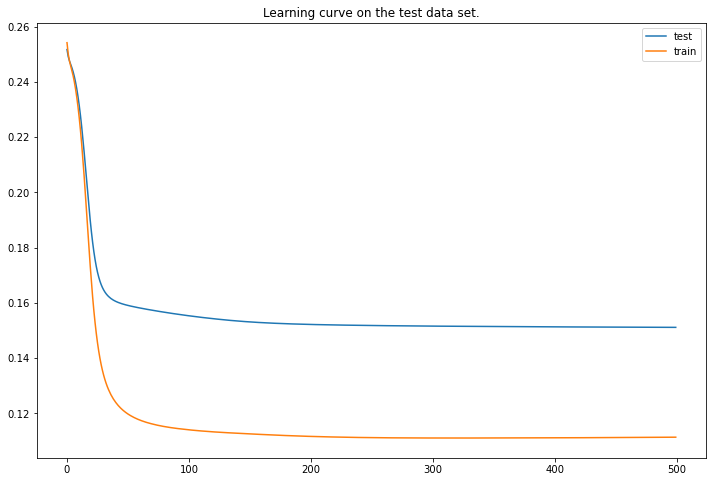

In [10]:
plt.figure(figsize = (12,8))
plt.plot(np.array(loss_trace), label ="test")
plt.plot(np.array(train_loss_trace), label = "train")
plt.title("Learning curve on the test data set.")
plt.legend()

In [11]:
xi = xi.to("cuda:0")
xi_ring = xi_ring.to("cuda:0")
weights = model(xi)/(1 - model(xi)+1e-8) *n/m #avoid division by 0
weights = weights.to("cpu").detach().numpy()

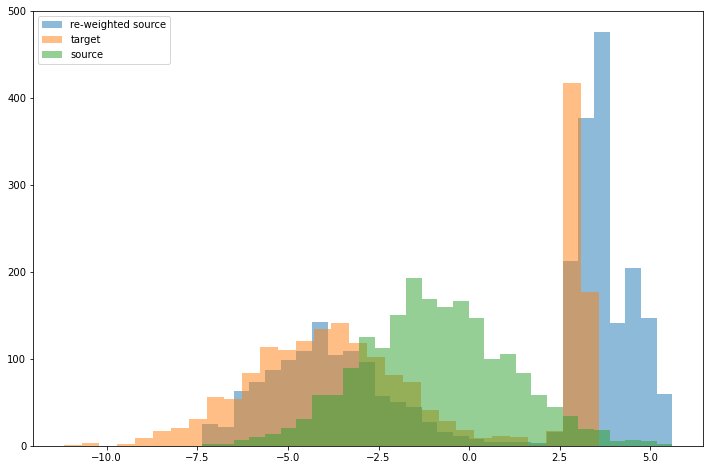

In [12]:
plt.figure(figsize = (12,8))
plt.hist(xi[:,0].to("cpu").detach().numpy(), weights = weights, alpha = 0.5, bins = 30, label ="re-weighted source")
plt.hist(xi_ring[:,0].to("cpu").detach().numpy(), alpha = 0.5, bins = 30, label ="target")
plt.hist(xi[:,0].to("cpu").detach().numpy(), alpha = 0.5, bins = 30, label ="source")
plt.legend()